In [533]:
import pandas as pd
import matplotlib as matplot

In [534]:
freezer_data = pd.read_csv('Data Storn - Semi final data sets/freezer_data.csv')
clusters = pd.read_csv('df_for_optimization.csv')

In [535]:
clusters

,Outlet_ID,area(sqft),tot_revnew,tot_icecream_vol,Clusters
0,1008,3387,3290990.0,6600.4,4
1,1012,1931,3648650.0,3275.0,4
2,1024,3127,7726300.0,6943.0,6
3,1029,5294,13401160.0,16518.0,8
4,1036,2584,6338870.0,8801.6,1
...,...,...,...,...,...
946,9960,4690,14184310.0,17087.2,0
947,9971,3960,3658320.0,7296.6,4
948,9973,4038,13501430.0,16468.8,8
949,9979,4456,3178310.0,6378.4,4


In [536]:
grouped_df = clusters.groupby('Clusters')['tot_revnew','tot_icecream_vol'].mean()
grouped_df['tot_revnew']=grouped_df['tot_revnew']/1000000
grouped_df['tot_icecream_vol']=grouped_df['tot_icecream_vol']/1000

C:\Users\DELL\AppData\Local\Temp\ipykernel_11044\2107345829.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = clusters.groupby('Clusters')['tot_revnew','tot_icecream_vol'].mean()


In [537]:
grouped_df

,tot_revnew,tot_icecream_vol
Clusters,,
0,14.379201,17.764569
1,6.021897,8.017609
2,2.014810,4.030800
3,28.182440,34.611200
4,3.523976,5.558741
5,19.767439,24.299047
6,7.631453,7.293865
7,15.699717,19.280465
8,13.167170,16.320815


In [538]:
freezer_data

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [539]:
temp1 = freezer_data[['Model Number','Power and maitainance Cost (LKR) per 100 hours','Volume Capacity (Liters)']]

In [540]:
temp1['Power and maitainance Cost (LKR) per 100 hours']=temp1['Power and maitainance Cost (LKR) per 100 hours']/100
temp1['Volume Capacity (Liters)']=temp1['Volume Capacity (Liters)']/10

C:\Users\DELL\AppData\Local\Temp\ipykernel_11044\3151176857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Power and maitainance Cost (LKR) per 100 hours']=temp1['Power and maitainance Cost (LKR) per 100 hours']/100
C:\Users\DELL\AppData\Local\Temp\ipykernel_11044\3151176857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Volume Capacity (Liters)']=temp1['Volume Capacity (Liters)']/10


In [541]:
grouped_df['tot_revnew'][9]

34.77513

In [542]:
for x in range(0,10):
    y1='return_of_investment'+str(x)
    y2='item_sales_ratio'+str(x)
    # temp1[y1]=grouped_df['tot_revnew'][x]/(temp1['Power and maitainance Cost (LKR) per 100 hours'])
    temp1[y2]=grouped_df['tot_icecream_vol'][x]/temp1['Volume Capacity (Liters)']
    # temp1[y2]=(temp1[y1])/(temp1[y2]*0.0001)
    # temp1[y2]=(grouped_df['tot_icecream_vol'][x]/temp1['Volume Capacity (Liters)'])/((temp1['Power and maitainance Cost (LKR) per 100 hours']**3))
    # temp1[y2]=1/(abs(grouped_df['tot_icecream_vol'][x]-temp1['Volume Capacity (Liters)'])*((temp1['Power and maitainance Cost (LKR) per 100 hours'])))
    # temp1[y2]=temp1[y2]*temp1[y1]

In [543]:
temp1

,Model Number,Power and maitainance Cost (LKR) per 100 hours,Volume Capacity (Liters),item_sales_ratio0,item_sales_ratio1,item_sales_ratio2,item_sales_ratio3,item_sales_ratio4,item_sales_ratio5,item_sales_ratio6,item_sales_ratio7,item_sales_ratio8,item_sales_ratio9
0,M001,25.0,5.5,3.229922,1.457747,0.732873,6.292945,1.010680,4.418009,1.326157,3.505539,2.967421,7.410909
1,M002,28.0,7.5,2.368609,1.069015,0.537440,4.614827,0.741165,3.239873,0.972515,2.570729,2.176109,5.434667
2,M003,32.0,12.0,1.480381,0.668134,0.335900,2.884267,0.463228,2.024921,0.607822,1.606705,1.360068,3.396667
3,M004,18.0,3.0,5.921523,2.672536,1.343600,11.537067,1.852914,8.099682,2.431288,6.426822,5.440272,13.586667
4,M005,35.0,15.0,1.184305,0.534507,0.268720,2.307413,0.370583,1.619936,0.486258,1.285364,1.088054,2.717333
5,M006,27.0,6.5,2.733011,1.233478,0.620123,5.324800,0.855191,3.738315,1.122133,2.966225,2.510895,6.270769
6,M007,30.0,10.0,1.776457,0.801761,0.403080,3.461120,0.555874,2.429905,0.729386,1.928047,1.632082,4.076000
7,M008,16.0,2.5,7.105828,3.207044,1.612320,13.844480,2.223496,9.719619,2.917546,7.712186,6.528326,16.304000
8,M009,28.0,8.0,2.220571,1.002201,0.503850,4.326400,0.694843,3.037381,0.911733,2.410058,2.040102,5.095000
9,M010,45.0,20.0,0.888228,0.400880,0.201540,1.730560,0.277937,1.214952,0.364693,0.964023,0.816041,2.038000


In [544]:
# # from sklearn.preprocessing import StandardScaler

# # # select columns to normalize
# # cols_to_normalize = []
# # for x in range(0,10):
# #     y1=('return_of_investment'+str(x))
# #     y=('ice_cream_sales_volum'+str(x))
# #     cols_to_normalize.append(y1)
# #     cols_to_normalize.append(y)

# # print(cols_to_normalize)

# # # create a MinMaxScaler object
# # scaler = StandardScaler()

# # # fit and transform selected columns
# # temp1[cols_to_normalize] = scaler.fit_transform(temp1[cols_to_normalize])

# from sklearn.preprocessing import StandardScaler

# # select columns to normalize
# cols_to_normalize = []
# for x in range(0,10):
#     y1=('return_of_investment'+str(x))
#     y=('item_sales_ratio'+str(x))
#     cols_to_normalize.append(y1)
#     cols_to_normalize.append(y)

# print(cols_to_normalize)

# # create a StandardScaler object
# scaler = StandardScaler()

# # fit and transform selected columns
# temp1[cols_to_normalize] = scaler.fit_transform(temp1[cols_to_normalize])



In [545]:
temp1

,Model Number,Power and maitainance Cost (LKR) per 100 hours,Volume Capacity (Liters),item_sales_ratio0,item_sales_ratio1,item_sales_ratio2,item_sales_ratio3,item_sales_ratio4,item_sales_ratio5,item_sales_ratio6,item_sales_ratio7,item_sales_ratio8,item_sales_ratio9
0,M001,25.0,5.5,3.229922,1.457747,0.732873,6.292945,1.010680,4.418009,1.326157,3.505539,2.967421,7.410909
1,M002,28.0,7.5,2.368609,1.069015,0.537440,4.614827,0.741165,3.239873,0.972515,2.570729,2.176109,5.434667
2,M003,32.0,12.0,1.480381,0.668134,0.335900,2.884267,0.463228,2.024921,0.607822,1.606705,1.360068,3.396667
3,M004,18.0,3.0,5.921523,2.672536,1.343600,11.537067,1.852914,8.099682,2.431288,6.426822,5.440272,13.586667
4,M005,35.0,15.0,1.184305,0.534507,0.268720,2.307413,0.370583,1.619936,0.486258,1.285364,1.088054,2.717333
5,M006,27.0,6.5,2.733011,1.233478,0.620123,5.324800,0.855191,3.738315,1.122133,2.966225,2.510895,6.270769
6,M007,30.0,10.0,1.776457,0.801761,0.403080,3.461120,0.555874,2.429905,0.729386,1.928047,1.632082,4.076000
7,M008,16.0,2.5,7.105828,3.207044,1.612320,13.844480,2.223496,9.719619,2.917546,7.712186,6.528326,16.304000
8,M009,28.0,8.0,2.220571,1.002201,0.503850,4.326400,0.694843,3.037381,0.911733,2.410058,2.040102,5.095000
9,M010,45.0,20.0,0.888228,0.400880,0.201540,1.730560,0.277937,1.214952,0.364693,0.964023,0.816041,2.038000


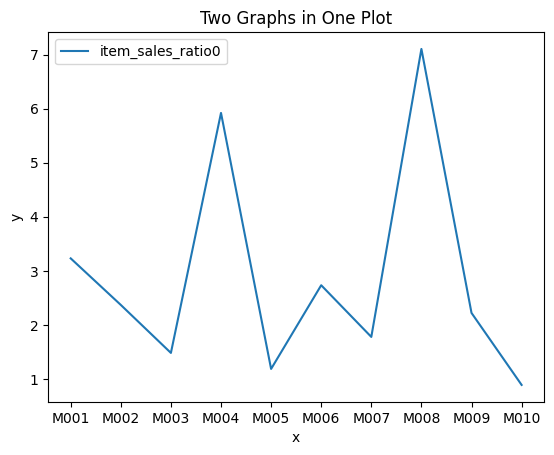

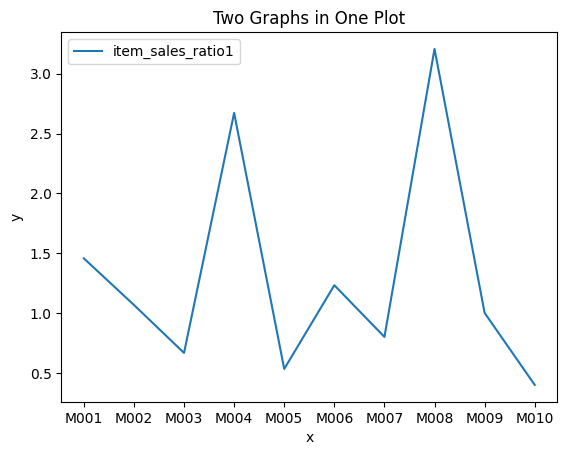

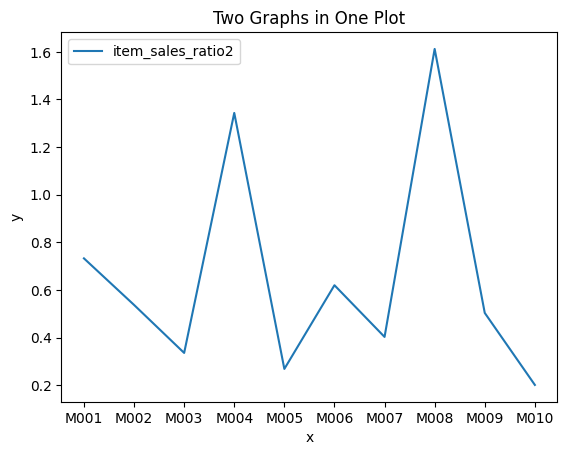

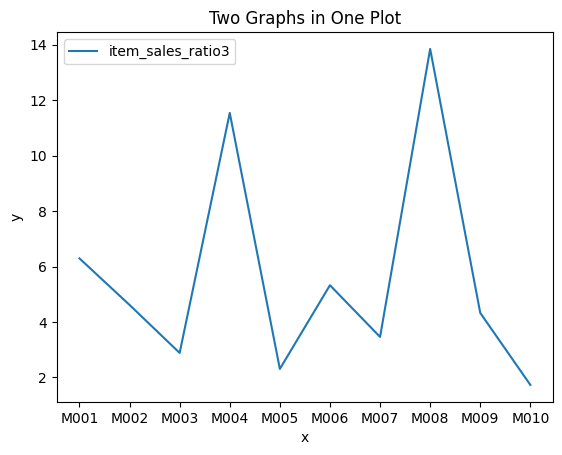

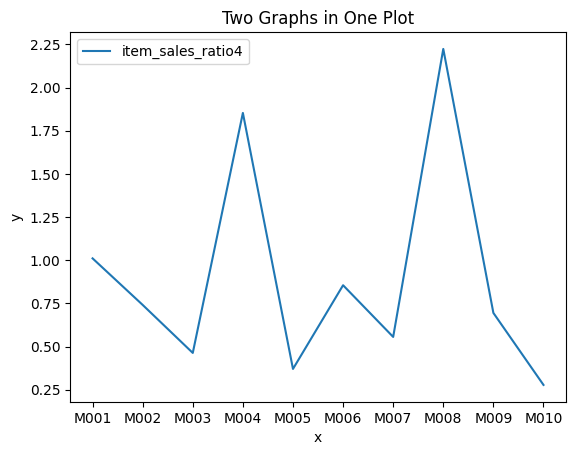

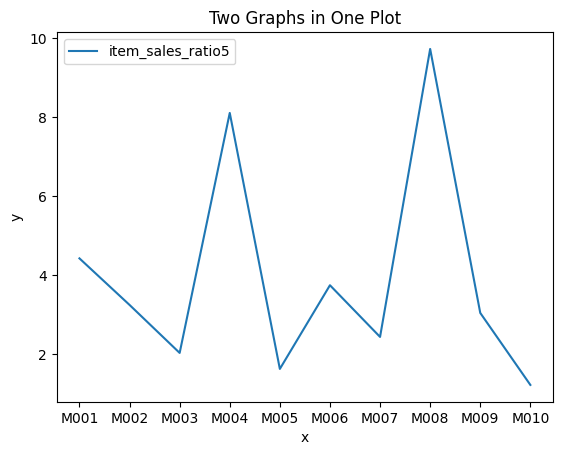

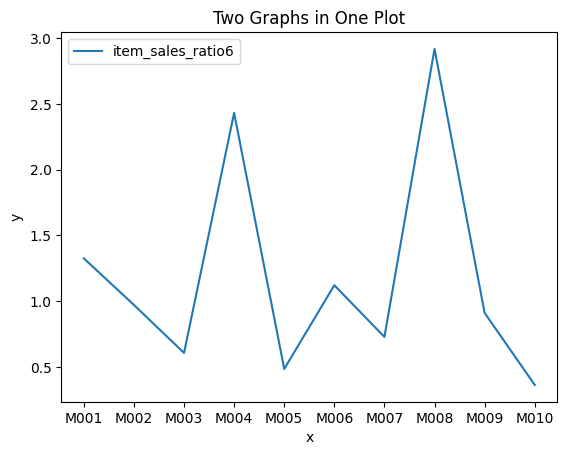

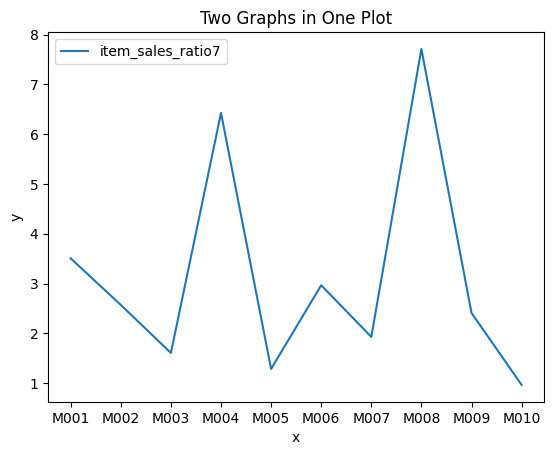

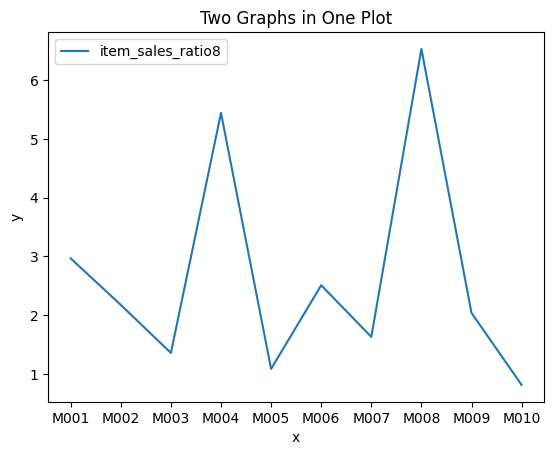

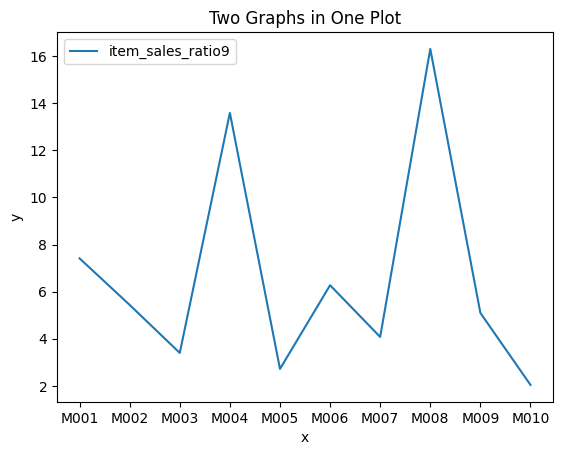

In [546]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # create a figure and axis object
# fig, ax = plt.subplots()

# # plot the first graph
# for x in range(0,10):
#     y1=('return_of_investment'+str(x))
#     y=('ice_cream_sales_volum'+str(x))
#     ax.plot(temp1['Model Number'], temp1[y1], label=y1)

#     # plot the second graph
#     ax.plot(temp1['Model Number'], temp1[y], label=y)

#     # set axis labels, title, and legend
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_title('Two Graphs in One Plot')
#     ax.legend()

#     # display the plot
#     plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# iterate over the tables
for x in range(0,10):
    # create a figure and axis object
    fig, ax = plt.subplots()

    # plot the first graph
    # y1 = 'return_of_investment' + str(x)
    # ax.plot(temp1['Model Number'], temp1[y1], label=y1)

    # plot the second graph
    y = 'item_sales_ratio' + str(x)
    ax.plot(temp1['Model Number'], temp1[y], label=y)

    # set axis labels, title, and legend
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Two Graphs in One Plot')
    ax.legend()

    # display the plot
    plt.show()



